In [16]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [3]:
df2 = df[df['species'].isin(['versicolor', 'virginica'])]
fig = px.scatter_3d(df2, x='sepal_width', y='sepal_length', z='petal_width', color='species')
fig.show()

In [6]:
X = df2[['sepal_width', 'sepal_length', 'petal_width']].values.copy()
y = df2[['species_id']].values.copy()
X.shape, y.shape

((100, 3), (100, 1))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 3), (20, 3), (80, 1), (20, 1))

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train.ravel())

LogisticRegression()

In [9]:
from sklearn.metrics import accuracy_score
y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy*100}%')

Accuracy: 95.0%


In [15]:
print("weights", model.coef_[0])
print("bias", model.intercept_[0])

weights [-0.7855547   0.85182473  3.68342479]
bias -9.159905549149387


In [19]:
import plotly.graph_objects as go

w = model.coef_[0]
b = model.intercept_[0]

def x2_function(x0,x1):
    return (-b - w[0]*x0 - w[1]*x1) / w[2]

x0_range = np.linspace(X[:,0].max(), X[:,0].min(), 10)
x1_range = np.linspace(X[:,1].max(), X[:,1].min(), 10)

x0_grid, x1_grid = np.meshgrid(x0_range, x1_range)
x2_grid = x2_function(x0_grid, x1_grid)

fig.add_trace(go.Surface(x=x0_grid, y=x1_grid, z=x2_grid))
fig.show()

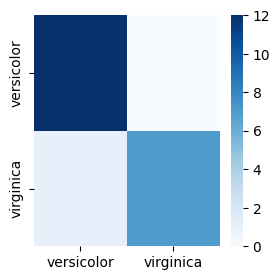

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)
labels = ['versicolor', 'virginica']
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, cmap='Blues', yticklabels=labels, xticklabels=labels)
plt.show()